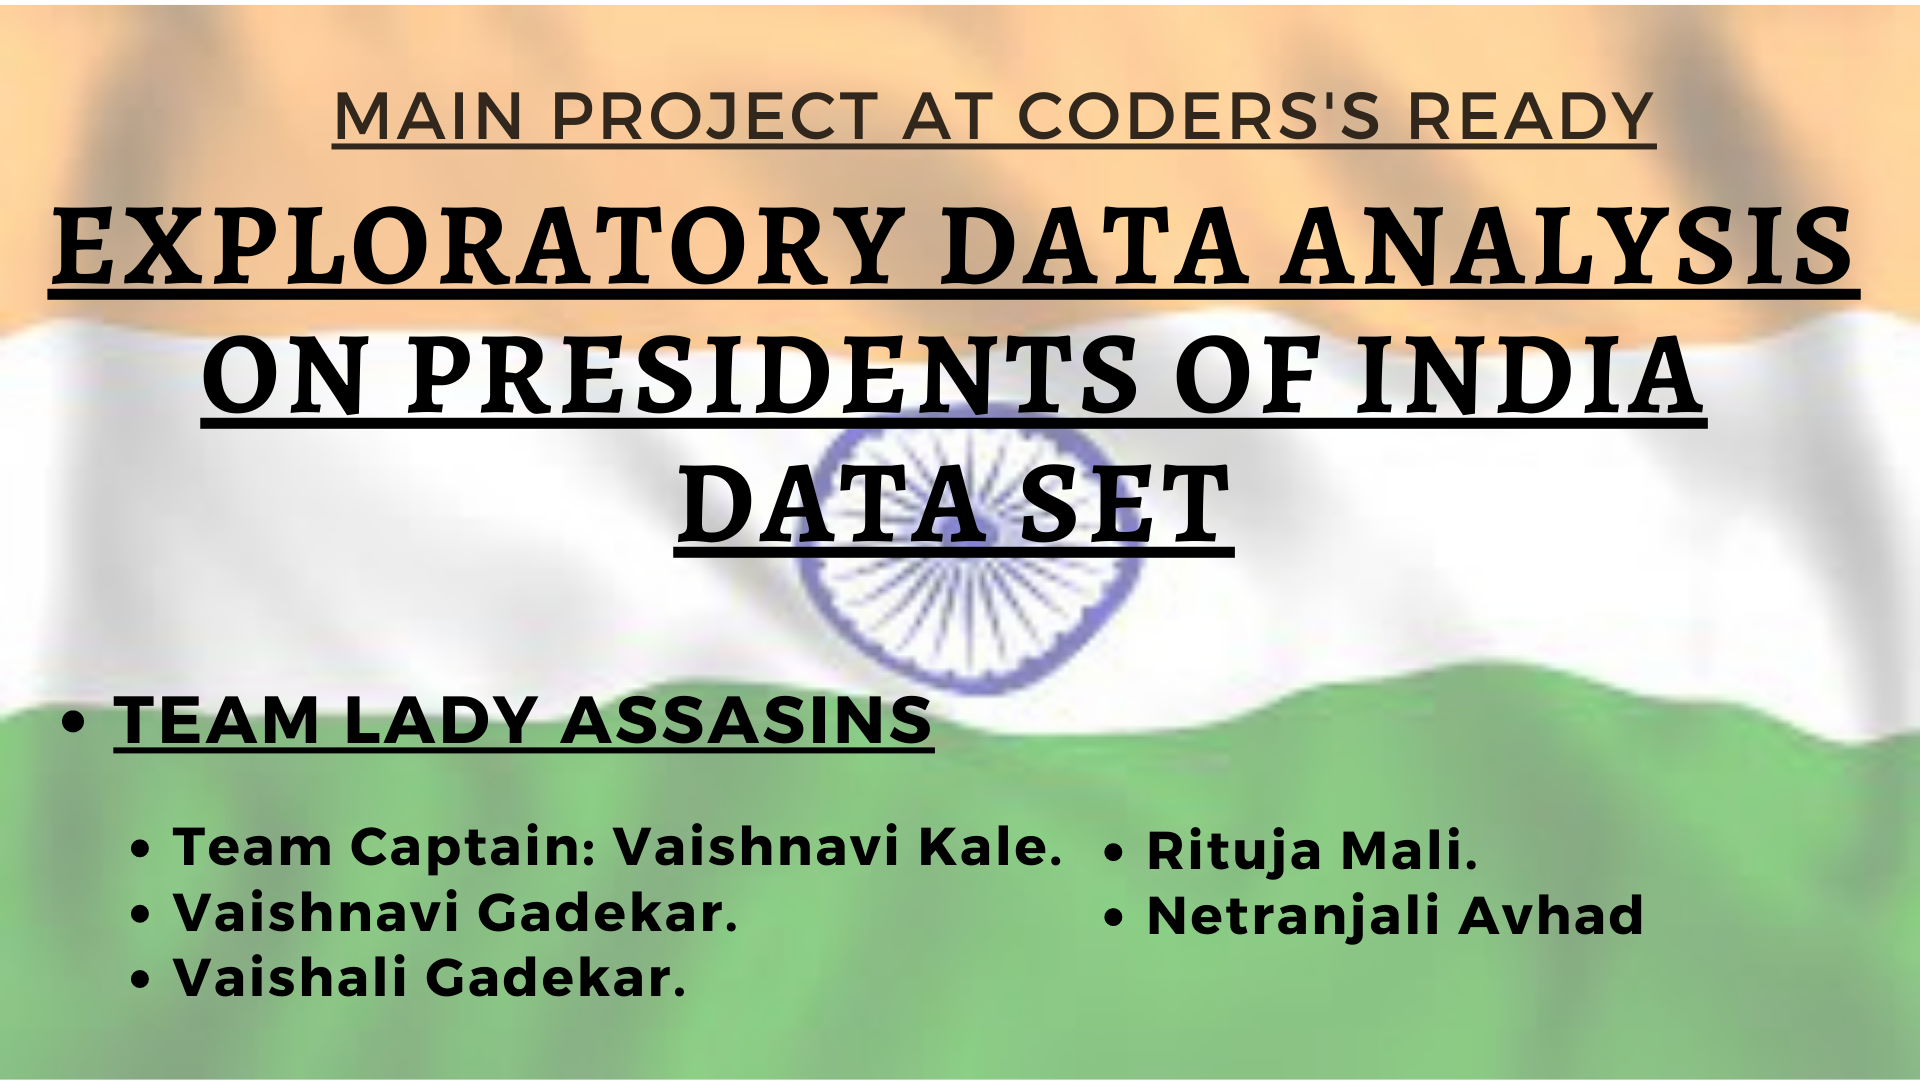

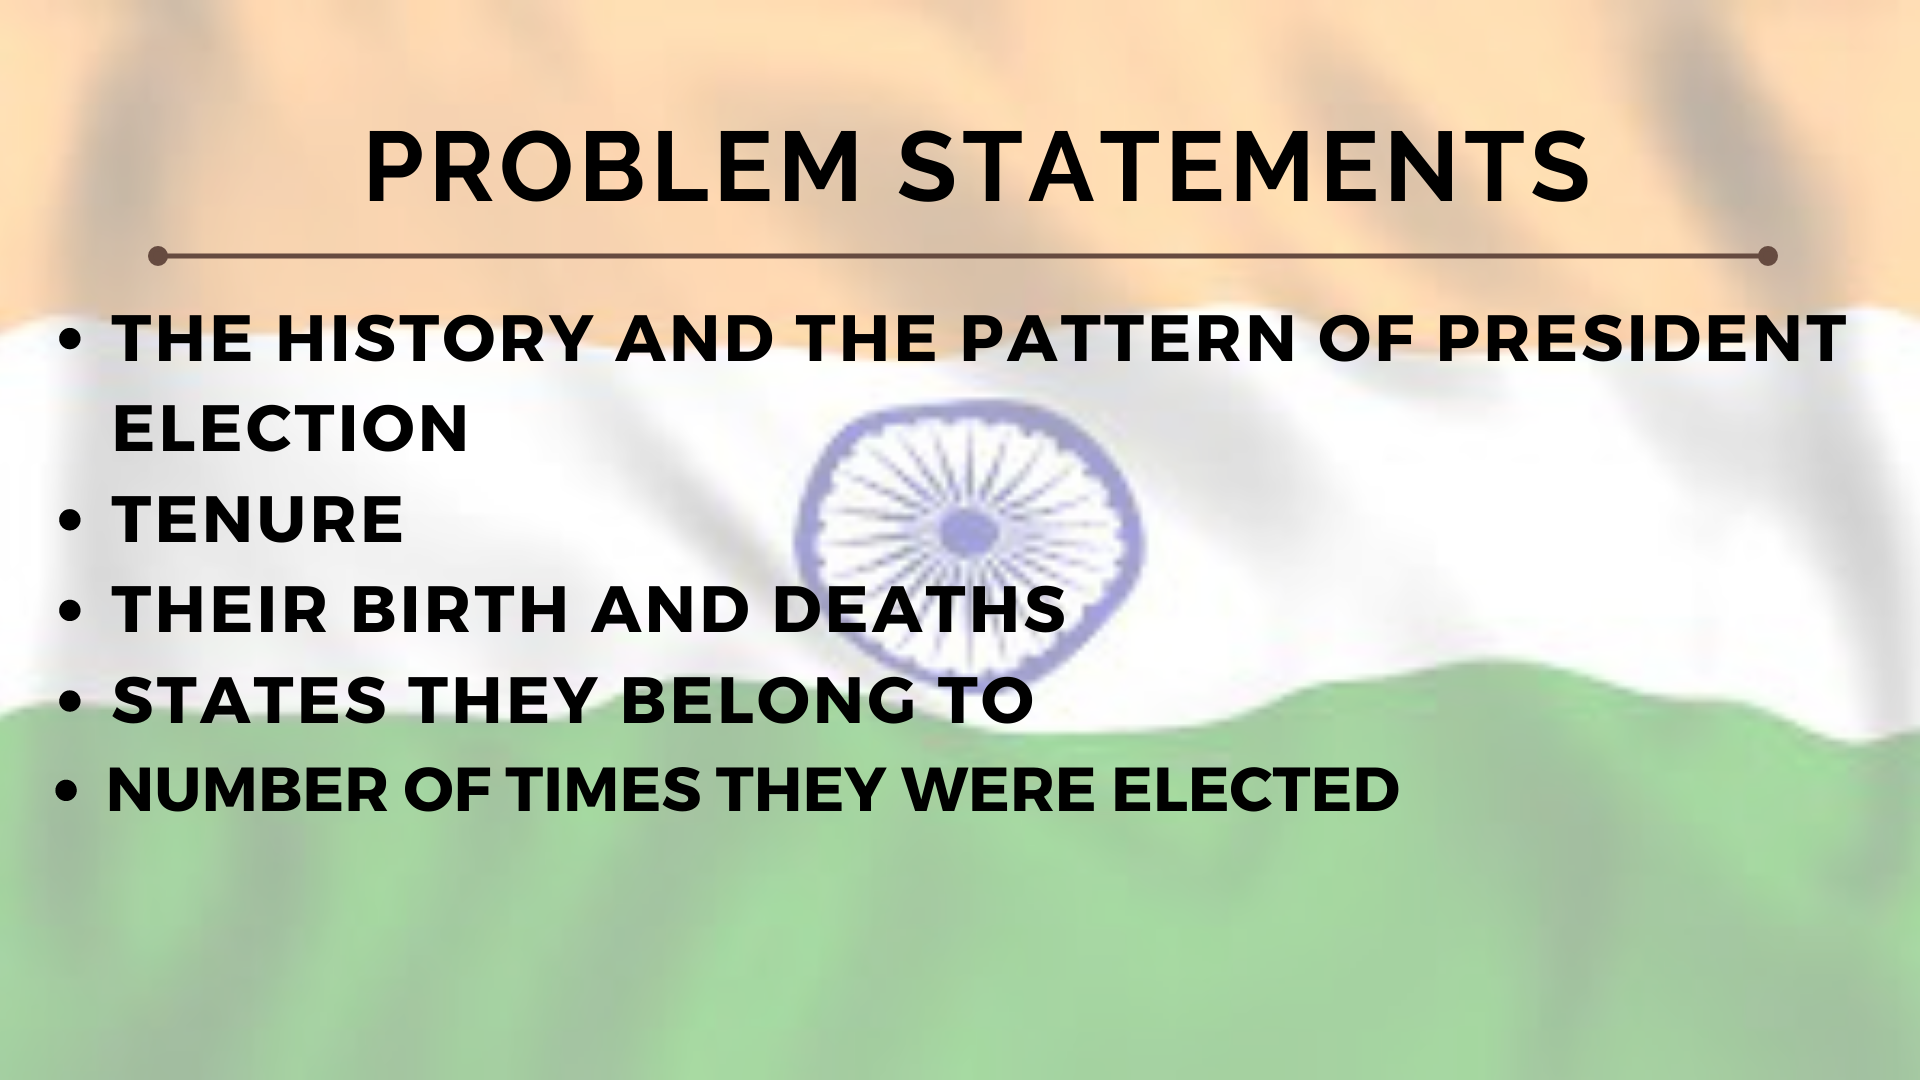

# `About the Data Set:`

- Name of the President
- Birth and Death Year
- Home State: State to which given president belongs
- Assumed office: It contains date on which given president of has assumed office of president of India
- Left Office: It contains date on which respective president left his office due to expiration of his/her term
- Election: It contains year on which election for president took place
- Vise President: Our constitution also has the provision of Vise President hence this column gives the name of vise president during the tenure of given president
- Appointment: According to Indian constitution President is appointed by chief of India hence this column reflects the name of CJI by whom the president has been appointed.
- Political Party: This column shows the Political Party to which respective president belongs to at the time of election.

# `Methodology:`

Exploratory Data Analysis, it is a technique that data professionals use to understand a datasets before starting to model it.

# `Anaysis of the Dataset:`

In [1]:
#importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#importing and reading data file:
file1=open('TEAM code_assassins- P(csv2).csv')
df=pd.read_csv(file1)
df.head()

,No.,Portrait,Name (Birth–Death),Home State,Assumed Office,Left Office,Time in Office,Election,Vice President,Appointed by,Political Party
0,Interim,NaN,Rajendra Prasad\n(1884–1963),Bihar,26-Jan-50,13-May-52,"12 years, 107 days",–,–,Harilal Jekisundas Kania,Indian National Congress
1,1,NaN,Rajendra Prasad\n(1884–1963),Bihar,13-May-52,13-May-57,"12 years, 107 days",1952,Sarvepalli Radhakrishnan,M. Patanjali Sastri,Indian National Congress
2,1,NaN,Rajendra Prasad\n(1884–1963),Bihar,13-May-57,13-May-62,"12 years, 107 days",1957,Sarvepalli Radhakrishnan,Sudhi Ranjan Das,Indian National Congress
3,2,NaN,Sarvepalli Radhakrishnan\n(1888–1975),Tamil Nadu,13-May-62,13-May-67,5 years,1962,Zakir Husain,Bhuvneshwar Prasad Sinha,Independent
4,3,NaN,Zakir Husain\n(1897–1969),Telangana,13-May-67,03-May-69,"1 year, 355 days",1967,Varahagiri Venkata Giri,K. N. Wanchoo,Independent


In [3]:
df.shape

(20, 11)

In [4]:
df.columns

Index(['No.', 'Portrait', 'Name (Birth–Death)', 'Home State', 'Assumed Office',
       'Left Office', 'Time in Office', 'Election', 'Vice President',
       'Appointed by', 'Political Party'],
      dtype='object')

In [5]:
df.isnull().sum()

No.                    0
Portrait              20
Name (Birth–Death)     0
Home State             0
Assumed Office         0
Left Office            0
Time in Office         0
Election               0
Vice President         0
Appointed by           0
Political Party        0
dtype: int64

In [6]:
#Dropping Portrait column because of its none values:
df=df.drop(columns='Portrait')
df.shape

(20, 10)

In [7]:
#Creating 2 more columns i.e NAME and BIRTH_AND_DEATHS by spliting Name(Birth-Death) column:
df[['NAME','BIRTH_AND_DEATH']] = df['Name (Birth–Death)'].str.split('\n', expand=True)

#Creating 2 more columns i.e year and days in office by spliting Time in office column:
df[['year','days']] = df['Time in Office'].str.split(',', expand=True)

In [8]:
df.isnull().sum()

No.                    0
Name (Birth–Death)     0
Home State             0
Assumed Office         0
Left Office            0
Time in Office         0
Election               0
Vice President         0
Appointed by           0
Political Party        0
NAME                   0
BIRTH_AND_DEATH        0
year                   0
days                  15
dtype: int64

In [9]:
#Filling null values by 0 in year and days columns:
df['days']=df['days'].fillna(0)

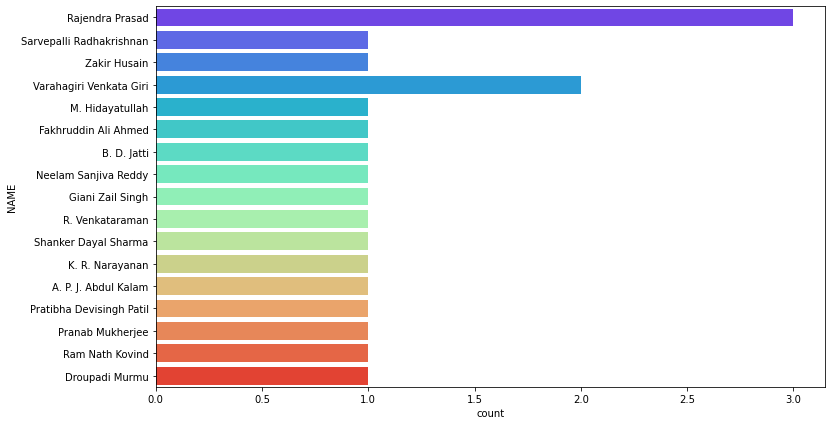

In [10]:
#Plotting bar graph count of presidents:
plt.figure(figsize=((12,7)))
sns.countplot(y='NAME',data=df,palette='rainbow');

## `- Rajendra Prasad is the only President who was elected thrice for seat of President.`

## `- Varahgiri Venkata Giri is the only president who was elected twice.`

## `- Rajendra Prasad (thrice) and Varahgiri (twice) belongs to as Indian National Congress party and strong followers of Mahatma Gandhi and his thoughts.`

[Text(0.5, 1.0, 'NO. OF TIMES PERSON ELECTED FROM STATES OF INDIA')]

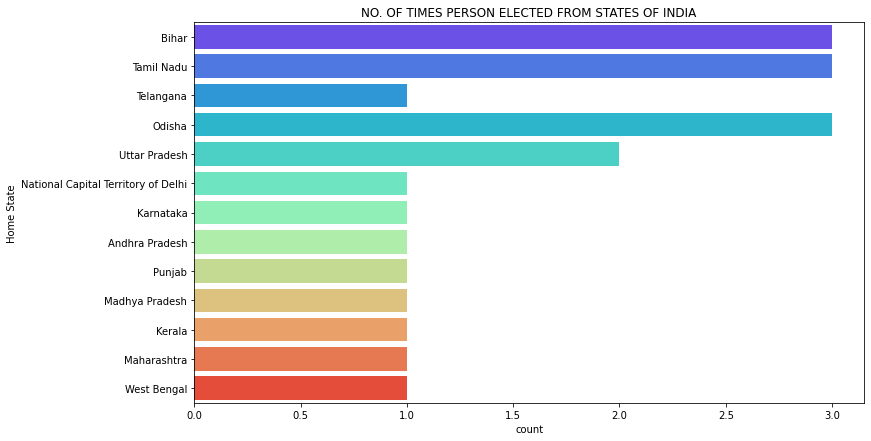

In [11]:
#Plotting bar graph showing Home State count of presidents:
plt.figure(figsize=((12,7)))
sns.countplot(y='Home State',data=df,palette='rainbow').set(title='NO. OF TIMES PERSON ELECTED FROM STATES OF INDIA')

## `- Maximum President are from the state Bihar and Tamilnadu followed by Odisha and Uttar Pradesh.`

## `Bihar- State of India with maximum number of gandhi supporters`

## `Tamil Nadu-(Madras before 1969) territories of congresss`

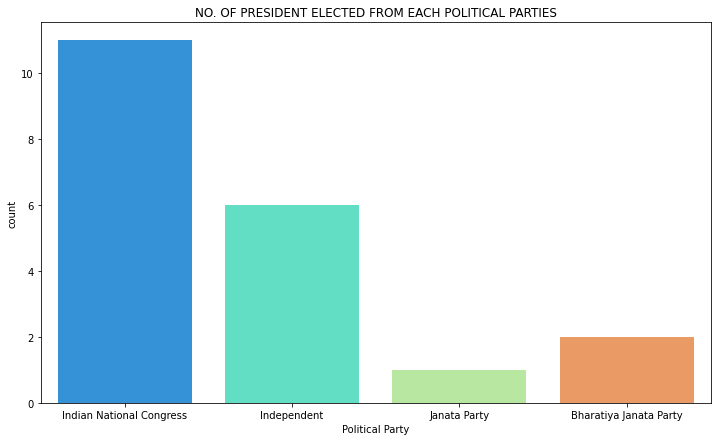

In [12]:
#Plotting bar graph showing Home State count of presidents:
plt.figure(figsize=((12,7)))
sns.countplot(x='Political Party',data=df,palette='rainbow').set(title='NO. OF PRESIDENT ELECTED FROM EACH POLITICAL PARTIES');

## `- Indian National Congress dominated Indian Politics because out of 20, 11 times Congress's President were elected`

## `- Mahatma Gandhi- most influential leader and politician of India and Indian National Congress Party`

In [13]:
#Replacing values for ease of plotting:
df =df.replace('12 years, 107 days' , 4487)
df =df.replace('5 years' , 1825)
df =df.replace('1 year, 355 days' , 700)
df =df.replace('2 years, 171 days' , 901)
df =df.replace('164 days' , 164)
df =df.replace('78 days' , 78)
df =df.replace('35 days' , 35)
df =df.replace('(1934–)' , '(1934-2022)')
df =df.replace('(1945–)' , '(1945-2022)')
df =df.replace('(1958–)' , '(1958-2022)')
df =df.replace('37 days' , 37)

df =df.replace('(1934–)' , '(1934-2022)')
df =df.replace('(1945–)' , '(1945-2022)')
df =df.replace('(1958–)' , '(1958-2022)')

In [14]:
def birth_year(string):
    return int(string[1:5])
df['Birth Year']=df['BIRTH_AND_DEATH'].map(birth_year)


In [15]:
#Creating new dataframe i.e df4 showing president and their dates of them on which they assumed office:
dates=df['Assumed Office']
day_list=[]
month_list=[]
year_list=[]
for i in dates:
    day=i[:2]
    month=i[3:6]
    year=i[7:]
    day_list.append(day)
    month_list.append(month)
    year_list.append(year)
    

df['Assumed_Day']= day_list
df['Assumed_month']=month_list
df['Assumed_year']=year_list


df=df.replace('Jan' ,'January')
df=df.replace('Jul' ,'July')
df=df.replace('Aug' ,'August')
df=df.replace('Feb' ,'February')

def full_year(string):
    year=int(string)
    if 1<year<25:
        return ('20'+string)
    else:
        return ('19'+string)
        
        
df['Assumed_year']=df['Assumed_year'].map(full_year)
df['Assumed Office']=df['Assumed_Day']+' '+df['Assumed_month']+' '+df['Assumed_year']

In [16]:
df['Assumed_year']=df['Assumed_year'].astype('int')
df['Age']=df['Assumed_year']-df['Birth Year']

In [17]:
new_df=df[['NAME','Assumed_year','Birth Year','Age','Time in Office']]
new_df.drop(1,inplace=True)
new_df.drop(2,inplace=True)

def gender(name):
    if name in ['Droupadi Murmu','Pratibha Devisingh Patil']:
        return 'Female'
    else:
        return 'Male'
    
new_df['Gender']= new_df['NAME'].map(gender)

In [18]:
new_df

,NAME,Assumed_year,Birth Year,Age,Time in Office,Gender
0,Rajendra Prasad,1950,1884,66,4487,Male
3,Sarvepalli Radhakrishnan,1962,1888,74,1825,Male
4,Zakir Husain,1967,1897,70,700,Male
5,Varahagiri Venkata Giri,1969,1894,75,78,Male
6,M. Hidayatullah,1969,1905,64,35,Male
7,Varahagiri Venkata Giri,1969,1894,75,1825,Male
8,Fakhruddin Ali Ahmed,1974,1905,69,901,Male
9,B. D. Jatti,1977,1912,65,164,Male
10,Neelam Sanjiva Reddy,1977,1913,64,1825,Male
11,Giani Zail Singh,1982,1916,66,1825,Male


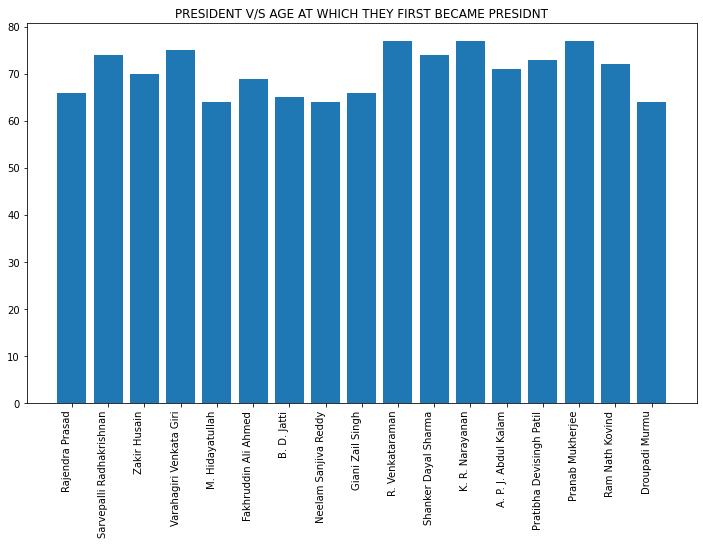

In [19]:
#Plotting graph using df2 showing president v/s age at which they first became president:
plt.figure(figsize=(12,7))
plt.bar(new_df['NAME'],new_df['Age'])
plt.xticks(rotation=90,horizontalalignment='right',fontweight='light',fontsize='medium' )
plt.title('PRESIDENT V/S AGE AT WHICH THEY FIRST BECAME PRESIDNT');

## `- The average age of becoming president of india before Ramnath Govind (64), Neelam Sanjiv Reddy (64) and Draupadi Murmu (64) was 71.9 Years. But after them it is decreased to 71.4 `

## `- The oldest to assume the office of president is VV Giri , born in 1894 and became president at the age of 75 years. `

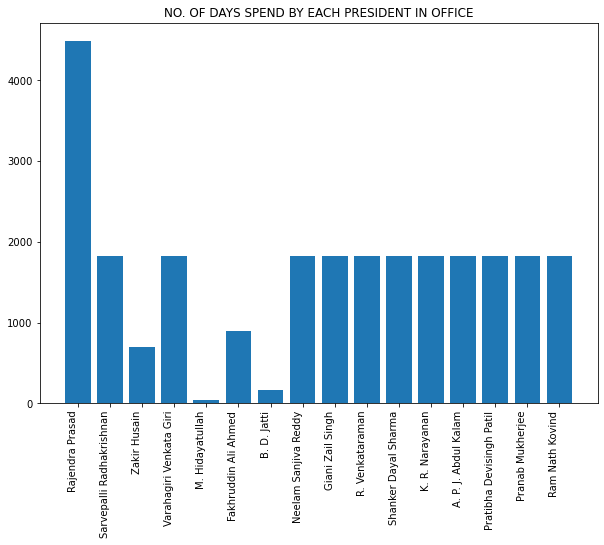

In [20]:
#Plotting the bar graph showing no. days spend by each president in office:
plt.figure(figsize=(10,7))
df1=new_df[['NAME','Time in Office']]
df1.drop(19,inplace=True)
plt.bar(df1['NAME'],df1['Time in Office'])
plt.xticks(rotation=90,horizontalalignment='right',fontweight='light',fontsize='medium' )
plt.title('NO. OF DAYS SPEND BY EACH PRESIDENT IN OFFICE');

## `- Mr. Rajendra Prasad was the only president who has largest duration of 4487 days in the office. `

## `- Mr. Hidayatulla is the only president who has spend minimum of 35 days in the office.`

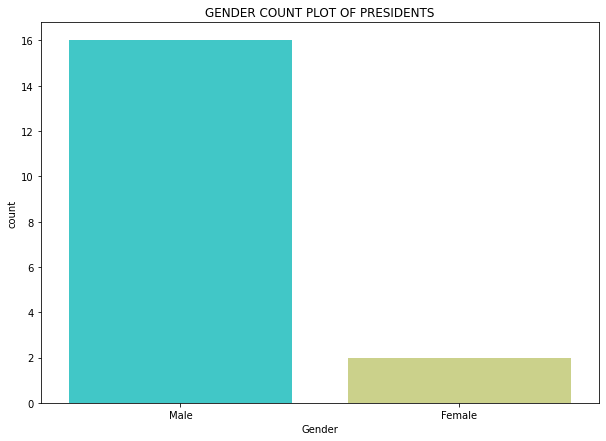

In [21]:
#Plotting sex count plot of presidents:
plt.figure(figsize=(10,7))
sns.countplot(x='Gender',data=new_df,palette='rainbow').set(title='GENDER COUNT PLOT OF PRESIDENTS');

## `- Ms. Pratibhatai Patil and Ms. Droupadi Murmu are the only females who held the office of president from independence till now.`

# `Conclusion:`

- Indian National Congress Ruled for 60 years following the ideals of Mahatma Gandhi  - If we follow this pattern, then we can say that for upcoming year BJP will dominate Indian Politics under the leadership of   Mr. Narendra Modi
- Also, Women's contribution in Indian Politics is still less (20%) even after 75 years of Independence, But considering the positive espect we can see that recent President Mrs Droupadi Murmu is the yougest president born after Independence so far in the Indian Histroy and also the first President belonging to Tribal community. Hence we can say that status of women representation is increasing in coming years.
